# Homework 6
## Looking at Gradient Descent More Indepth


The following two functions implement the Gradient Descent algorithm for a linear fit to data (modeling your data using a straight line). The mse function is used internally by the gradient_descent function, and does not need to be called directly. gradient_descent takes 6 inputs: x_observations, y_observations, epochs (number of interations to perform before stopping), step size, starting value of m (slope), and starting value of b (y-intercept)

In [1]:
# function to compute Mean Squared Error
def mse(y_current, y_obs, N):
    m = np.array( (y_obs-y_current)**2 )
    m = m.sum()/N
    return m

# function to implement gradient descent
def gradient_descent(x_obs, y_obs, epochs, step_size, m_current, b_current):
    best_cost = float('inf')
    best_m = 0
    best_b = 0
    N = float(len(y_obs))
    for i in range(epochs):
        # use the current slope and y-intercept to define a straight line
        y_current = (m_current * x_obs) + b_current
        # compute the MSE of the above line
        cost = mse(y_current, y_obs, N)
        # did we improve? If the 'cost' (the MSE value) is less than what we've seen 
        # previously then mark this m and b as our current best option
        if ( cost < best_cost ):
            best_cost = cost
            best_m = m_current
            best_b = b_current
        # which direction, and by how much, should we change m and b?
        # compute the gradient to find out
        m_gradient = -(2./N) * sum(x_obs * (y_obs - y_current))
        b_gradient = -(2./N) * sum(y_obs - y_current)
        # update m and b based on the gradient and the step size
        m_current = m_current - (step_size * m_gradient)
        b_current = b_current - (step_size * b_gradient)
    return best_m, best_b, best_cost

This next cell reads and formats our web site usage data from class. We will reuse this data throughout the homework.

In [2]:
# import the libraries we'll need
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read the web site traffic data using Pandas
#url = 'https://narock.github.io/teaching/CST-411/web_site.tsv'
#data = pd.read_csv(url, sep="\t")
data = pd.read_csv('web_site.tsv', sep='\t')

# set up the data as numpy arrays instead of Pandas table
# this will make the computations easier
x_obs = data['Days'].tolist()
y_obs = data['Time'].tolist()
x_obs = np.array( x_obs )
y_obs = np.array( y_obs )

Is the output of the Gradient Descent algorithm impacted by where we start searching? In other words, what impact, if any, do our initial guesses of m and b have on the results?

1.) Set up a loop that calls gradient_descent 100 times. Each time through the loop use random starting values for m and b. Your random values should be in the range [-5,5). Use an epoch of 5000 and a step size of 0.00001. Keep track of 100 m, b, and cost function results. <b>(Note that this cell may take several seconds to execute. Make sure it has completed before moving on).</b>

In [3]:
# initial values
m_results = []
b_results = []
cost_results = []
epochs = 5000
step_size = 0.00001
for i in range(100):
    m_guess = np.random.uniform(-5,5)
    b_guess = np.random.uniform(-5,5)
    best_m, best_b, best_cost = gradient_descent(x_obs, y_obs, epochs, step_size, m_guess, b_guess)
    m_results.append(best_m)
    b_results.append(best_b)
    cost_results.append(best_cost)

2.) Create a scatter plot of the 100 m and b values from problem 1. Place m on the x-axis
and b on the y-axis. Label both axes and provide a title for the plot.

Text(0.5,1,"'best' fit results of m and b for 100 random starting values")

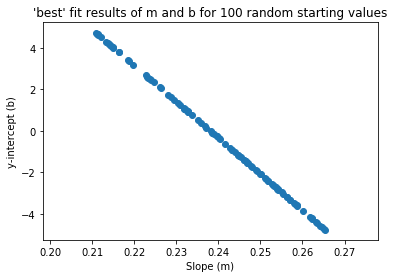

In [4]:
plt.scatter(m_results,b_results)
plt.xlabel('Slope (m)')
plt.ylabel('y-intercept (b)')
plt.title("'best' fit results of m and b for 100 random starting values")

3.) Create a histogram of the 100 cost function values returned from problem 1.

(array([ 0.,  0.,  0.,  0., 27., 16., 16.,  7.,  5.,  5.,  7.,  0.,  1.,
         2.,  2.,  2.,  4.,  1.,  4.]),
 array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104]),
 <a list of 19 Patch objects>)

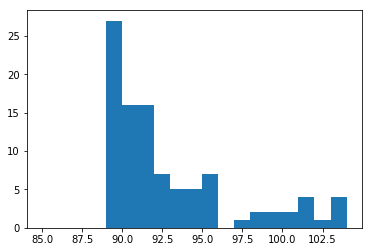

In [5]:
plt.hist(cost_results, bins=np.arange(85,105,1))

4.) Do m and b seem to be impacted by where we start our search? Does one parameter (m or b) seem to be more impacted than the other, or are they both equally impacted? What are your thoughts on why this might be the case?

#### Yes, m and b are impacted by where we start our search. b appears to be impact more as there is a larger distribution of b results than m results. We can also see this in the wide variety of cost function results we get.

5.) Now we'll look at the impact of step size on the algorithm. We'll keep the initial guess for m and b constant. Use 0 as an initial guess for both m and b. Set the epoch value to 5000. Use these values to execute the gradient_descent function with step size values of 0.01, 0.001, 0.0001, and 0.00001. Keep track of the m, b, and cost function results from all four executions.

In [3]:
epochs = 5000
m_01, b_01, cost_01 = gradient_descent(x_obs, y_obs, epochs, 0.01, 0., 0.)
m_001, b_001, cost_001 = gradient_descent(x_obs, y_obs, epochs, 0.001, 0., 0.)
m_0001, b_0001, cost_0001 = gradient_descent(x_obs, y_obs, epochs, 0.0001, 0., 0.)
m_00001, b_00001, cost_00001 = gradient_descent(x_obs, y_obs, epochs, 0.00001, 0., 0.)
m = [m_01, m_001, m_0001, m_00001]
b = [b_01, b_001, b_0001, b_00001]
c = [cost_01, cost_001, cost_0001, cost_00001]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in multiply


6.) Create a scatter plot of the m and b values that you obtained in problem 5. Place m on the x-axis
and b on the y-axis. Label both axes and provide a title for the plot.

[0.0, 0.0, 0.23827134332922545]
[0.0, 0.0, -0.0442405936887855]


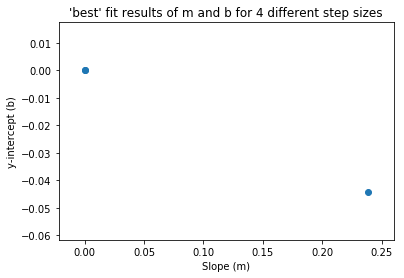

In [4]:
plt.scatter(m,b)
plt.xlabel('Slope (m)')
plt.ylabel('y-intercept (b)')
plt.title("'best' fit results of m and b for 4 different step sizes")
print(m)
print(b)

<b>Extra Credit</b> - recreate the plot from 6. but this time label the points so we know which point goes with which step size. You can label the points using colors, text labels, or both. Your choice.

7.) Summarize the impacts of step size and starting location on the results of Gradient Descent. Do you feel that one is has more of an impact than the other? 

Can we improve our results any by not being so random in how we initially choose m and b? Here we're looking at web site traffic data. We have data on how long someone has been a member of the site and how long they stay on the site. Let's say we research other web sites with similar functionality. Our research indicates that the 'best' fit y-intercept (b) is usually between -0.5 and 0.5. Will restricting the starting value of b to be between -0.5 and 0.5 have any impact on the results we get? 

8.) Repeat problem 1. but this time restrict your random guess of b to be between -0.5 and 0.5 instead of -5 and 5. Keep your random guess of m to between -5 and 5.

In [9]:
m_results = []
b_results = []
cost_results = []
epochs = 5000
step_size = 0.00001
for i in range(100):
    m_guess = np.random.uniform(-5,5)
    b_guess = np.random.uniform(-0.5,0.5)
    best_m, best_b, best_cost = gradient_descent(x_obs, y_obs, epochs, step_size, m_guess, b_guess)
    m_results.append(best_m)
    b_results.append(best_b)
    cost_results.append(best_cost)

9.) Create a scatter plot of the 100 m and b values from problem 8. Place m on the x-axis
and b on the y-axis. Label both axes and provide a title for the plot.

Text(0.5,1,"'best' fit results of m and b for 100 random starting values")

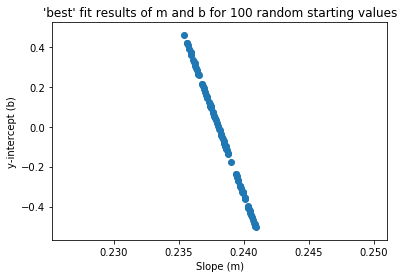

In [10]:
plt.scatter(m_results,b_results)
plt.xlabel('Slope (m)')
plt.ylabel('y-intercept (b)')
plt.title("'best' fit results of m and b for 100 random starting values")

10.) Create a histogram of the 100 cost function values returned from problem 8.

(array([ 0.,  0.,  0.,  0., 64., 36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104]),
 <a list of 19 Patch objects>)

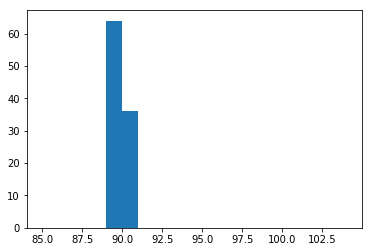

In [11]:
plt.hist(cost_results, bins=np.arange(85,105,1))

11.) What impact, if any, did this have on the results of our Gradient Descent algorithm? Was applying background/domain information helpful?

#### Yes, applying background/domain information was helpful. The results are now constrained to a much narrower interval. Similarly, the cost function results are also confimned to a narrower interval.

What is the optimal step size to use? What should we do if we don't have background/domain information to guide our initial guesses of m and b? This is currently an active area of research in machine learning. There are some tips and guidelines; however, in general, it's still an open question.

12.) One thing reseachers and practitioners are doing is working with a variable step size. The idea is to gradually decrease the step size as you move through the epochs. The thinking is that we take larger steps in the beginning as we're finding our way and we take smaller steps towards the end as we're, hopefully, closing in on the solution.

Copy and paste the gradient_descent function into the cell below. Rename it to be gradient_descent2. Modify gradient_descent2 so that the step size decreases as you move through the epochs. How much the step size decreases and when is up to you. Try implementing different approaches and see what impact it has on the results. Are you able to obtain a lower cost function value using a variable step size? If you're not, don't worry, this problem is more focused on how you would update the algorithm to implement this idea.

In [260]:
# function to implement gradient descent
def gradient_descent2(x_obs, y_obs, epochs, step_size, m_current, b_current):
    best_cost = float('inf')
    best_m = 0
    best_b = 0
    N = float(len(y_obs))
    for i in range(epochs):
        y_current = (m_current * x_obs) + b_current
        cost = mse(y_current, y_obs, N)
        if ( cost < best_cost ):
            best_cost = cost
            best_m = m_current
            best_b = b_current
        m_gradient = -(2./N) * sum(x_obs * (y_obs - y_current))
        b_gradient = -(2./N) * sum(y_obs - y_current)
        m_current = m_current - (step_size * m_gradient)
        b_current = b_current - (step_size * b_gradient)
        step_size = 0.9*step_size
    return best_m, best_b, best_cost

In [287]:
m = 0.
b = 0.
epochs = 5000
step_size = 0.00001
best_m, best_b, best_cost = gradient_descent2(x_obs, y_obs, epochs, step_size, m, b)
print("Values with variable step size")
print(best_m, best_b, best_cost)
print("Values without changing step size")
print(0.23827139443683107, -0.044249518043758054, 89.89068515273581)

Values with variable step size
0.23269426227645626 0.0012393483907094088 90.41686054768329
Values without changing step size
0.23827139443683107 -0.044249518043758054 89.89068515273581
